In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

The data was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) and then cleaned for analysis. The principal investigators responsible for data collection were:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


In [4]:
heart.groupby('heart_disease').mean()

,age,trestbps,chol,exang,fbs,thalach
heart_disease,,,,,,
absence,52.585366,129.250000,242.640244,0.140244,0.140244,158.378049
presence,56.625899,134.568345,251.474820,0.546763,0.158273,139.258993


In [5]:
heart.groupby('heart_disease').median()

,age,trestbps,chol,exang,fbs,thalach
heart_disease,,,,,,
absence,52.0,130.0,234.5,0.0,0.0,161.0
presence,58.0,130.0,249.0,1.0,0.0,142.0


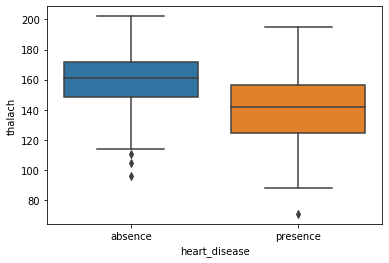

In [6]:
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.show()

In [17]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print('p-value for `thalach` two-sample t-test: ', pval)

p-value for `thalach` two-sample t-test:  3.456964908430172e-14


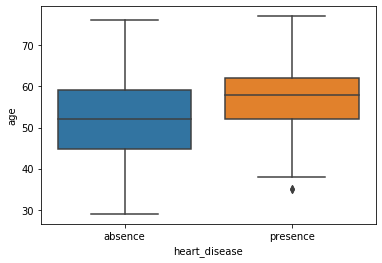

In [7]:
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.show()

In [18]:
age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']
tstat, pval = ttest_ind(age_hd, age_no_hd)
print('p-value for `age` two-sample t-test: ', pval)

p-value for `age` two-sample t-test:  8.955636917529706e-05


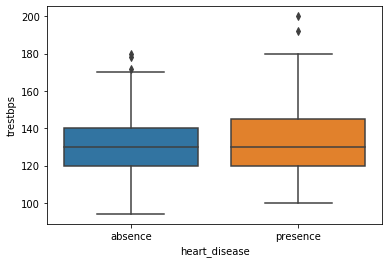

In [19]:
sns.boxplot(x=heart.heart_disease, y=heart.trestbps)
plt.show()

In [20]:
trestbps_hd = heart.trestbps[heart.heart_disease == 'presence']
trestbps_no_hd = heart.trestbps[heart.heart_disease == 'absence']
tstat, pval = ttest_ind(trestbps_hd, trestbps_no_hd)
print('p-value for `trestbps` two-sample t-test: ', pval)

p-value for `trestbps` two-sample t-test:  0.008548268928594928


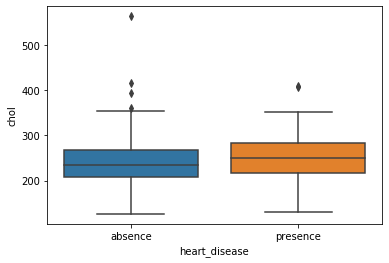

In [9]:
sns.boxplot(x=heart.heart_disease, y=heart.chol)
plt.show()

In [21]:
chol_hd = heart.chol[heart.heart_disease == 'presence']
chol_no_hd = heart.chol[heart.heart_disease == 'absence']
tstat, pval = ttest_ind(chol_hd, chol_no_hd)
print('p-value for `chol` two-sample t-test: ', pval)

p-value for `chol` two-sample t-test:  0.13914167020436527


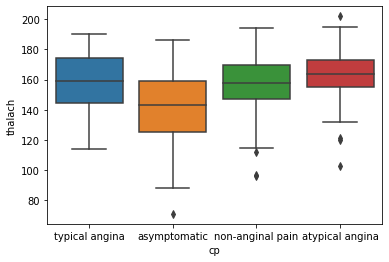

In [10]:
sns.boxplot(x=heart.cp, y=heart.thalach)
plt.show()

In [11]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

In [12]:
from scipy.stats import f_oneway
Fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print('p-value for ANOVA: ', pval)

p-value for ANOVA:  1.9065505247705008e-10


In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
output = pairwise_tukeyhsd(heart.thalach, heart.cp)
print(output)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


In [14]:
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [15]:
from scipy.stats import chi2_contingency
chi2, pval, dof, exp = chi2_contingency(Xtab)
print('p-value for chi-square test: ', pval)

p-value for chi-square test:  1.2517106007837527e-17


# Bonus 

Simulating these tests (if there's time)

In [22]:
# 2-sample t-test

# using a scipy function
trestbps_hd = heart.trestbps[heart.heart_disease == 'presence']
trestbps_no_hd = heart.trestbps[heart.heart_disease == 'absence']
tstat, pval = ttest_ind(trestbps_hd, trestbps_no_hd)
print('scipy p-value for `trestbps` two-sample t-test: ', pval)

scipy p-value for `trestbps` two-sample t-test:  0.008548268928594928


In [35]:
# using simulation
null_mean_diffs = []
for i in range(1000):
    scrambled = np.random.choice(heart.heart_disease, size = len(heart), replace = False)
    trestbps_hd_sim = heart.trestbps[scrambled == 'presence']
    trestbps_no_hd_sim = heart.trestbps[scrambled == 'absence']
    sim_mean_diff = np.mean(trestbps_hd_sim) - np.mean(trestbps_no_hd_sim)
    null_mean_diffs.append(sim_mean_diff)

In [40]:
# calculate p-value
observed_mean_diff = np.mean(trestbps_hd) - np.mean(trestbps_no_hd)
pval_sim = np.sum(np.array(null_mean_diffs) > observed_mean_diff)/1000 * 2
print('simulated p-value for `trestbps` two-sample t-test: ', pval_sim)

simulated p-value for `trestbps` two-sample t-test:  0.008


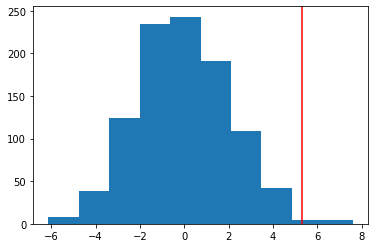

In [36]:
plt.hist(null_mean_diffs)
plt.axvline(x = observed_mean_diff, color = 'red')
plt.show()

In [41]:
# chi-sq test with scipy
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
from scipy.stats import chi2_contingency
chi2, pval, dof, exp = chi2_contingency(Xtab)
print('scipy p-value for chi-square test: ', pval)

scipy p-value for chi-square test:  1.2517106007837527e-17


In [60]:
probs_cp = heart.cp.value_counts(normalize=True).sort_index()
probs_cp

asymptomatic        0.475248
atypical angina     0.165017
non-anginal pain    0.283828
typical angina      0.075908
Name: cp, dtype: float64

In [61]:
probs_hd = heart.heart_disease.value_counts(normalize=True)
probs_hd

absence     0.541254
presence    0.458746
Name: heart_disease, dtype: float64

In [64]:
Xtab = pd.crosstab(heart.heart_disease,heart.cp)
from scipy.stats import chi2_contingency
chi2, pval, dof, exp = chi2_contingency(Xtab)
print(exp)
print(chi2)

[[77.94059406 27.06270627 46.54785479 12.44884488]
 [66.05940594 22.93729373 39.45214521 10.55115512]]
81.81577027653815


In [67]:
observed = pd.crosstab(heart.heart_disease,heart.cp)
expected = np.array([probs_hd[0] * probs_cp, probs_hd[1] * probs_cp])*len(heart)
print(expected)
obs_chi2 = ((observed-expected)**2/expected).sum().sum()
print(obs_chi2)

[[77.94059406 27.06270627 46.54785479 12.44884488]
 [66.05940594 22.93729373 39.45214521 10.55115512]]
81.81577027653816


In [68]:
null_chisqs = []
expected = np.array([probs_hd[0] * probs_cp, probs_hd[1] * probs_cp])*len(heart)

for i in range(1000):
    scrambled_hd = np.random.choice(heart.heart_disease, size = len(heart), replace = False)
    scrambled_cp = np.random.choice(heart.cp, size = len(heart), replace = False)
    sim_observed = pd.crosstab(scrambled_hd,scrambled_cp)
    sim_chisq = ((sim_observed-expected)**2/expected).sum().sum()
    null_chisqs.append(sim_chisq)

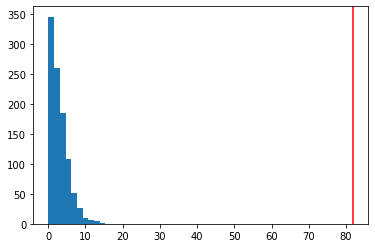

In [69]:
plt.hist(null_chisqs)
plt.axvline(x = obs_chi2, color = 'red')
plt.show()